# EDA Student Performance - Utkarsh Gaikwad

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read Dataset 
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## No Missing Values Found

In [7]:
df.duplicated().sum()

0

## No Duplicates found

In [8]:
# Unique Values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [10]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
gender,1000,2,female,518
race_ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


In [11]:
# Seperate Numeric and categorical features
numerical_features = list(df.select_dtypes(exclude='object').columns)
categorical_features = list(df.select_dtypes(include='object').columns)

In [12]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [13]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [14]:
# Aggregate Total Score with mean
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


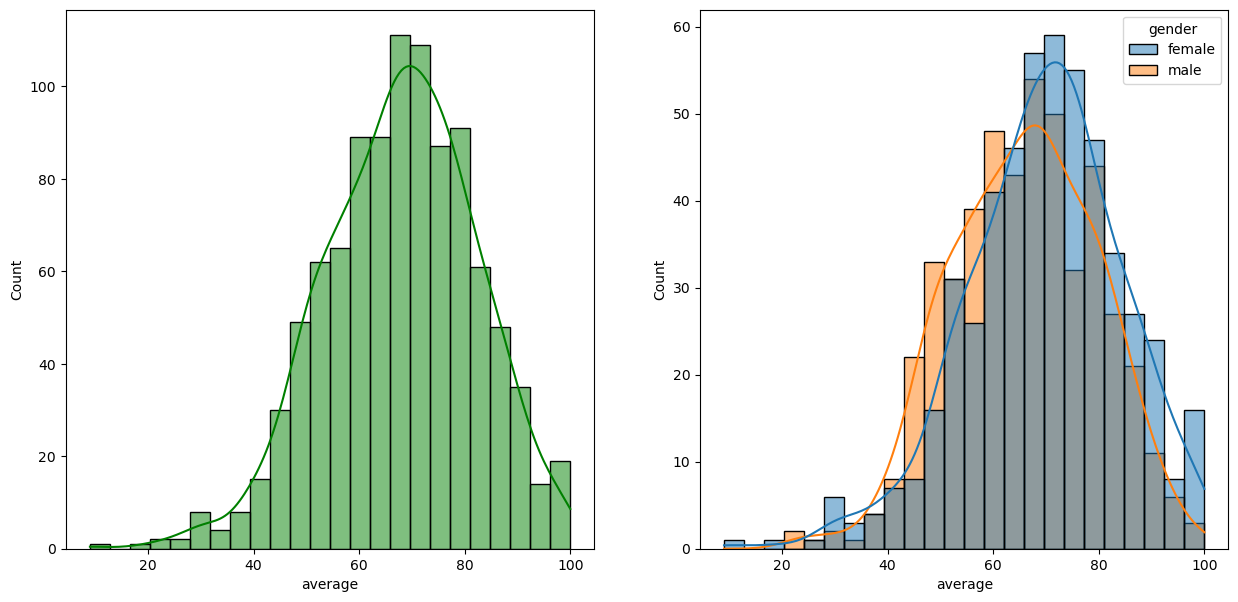

In [15]:
# Univariate Analysis
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins='fd',color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,bins='fd',hue='gender')
plt.show()

## Insights 

### Female Students tend to perform better than male students

In [16]:
df.groupby(by='gender').mean()

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


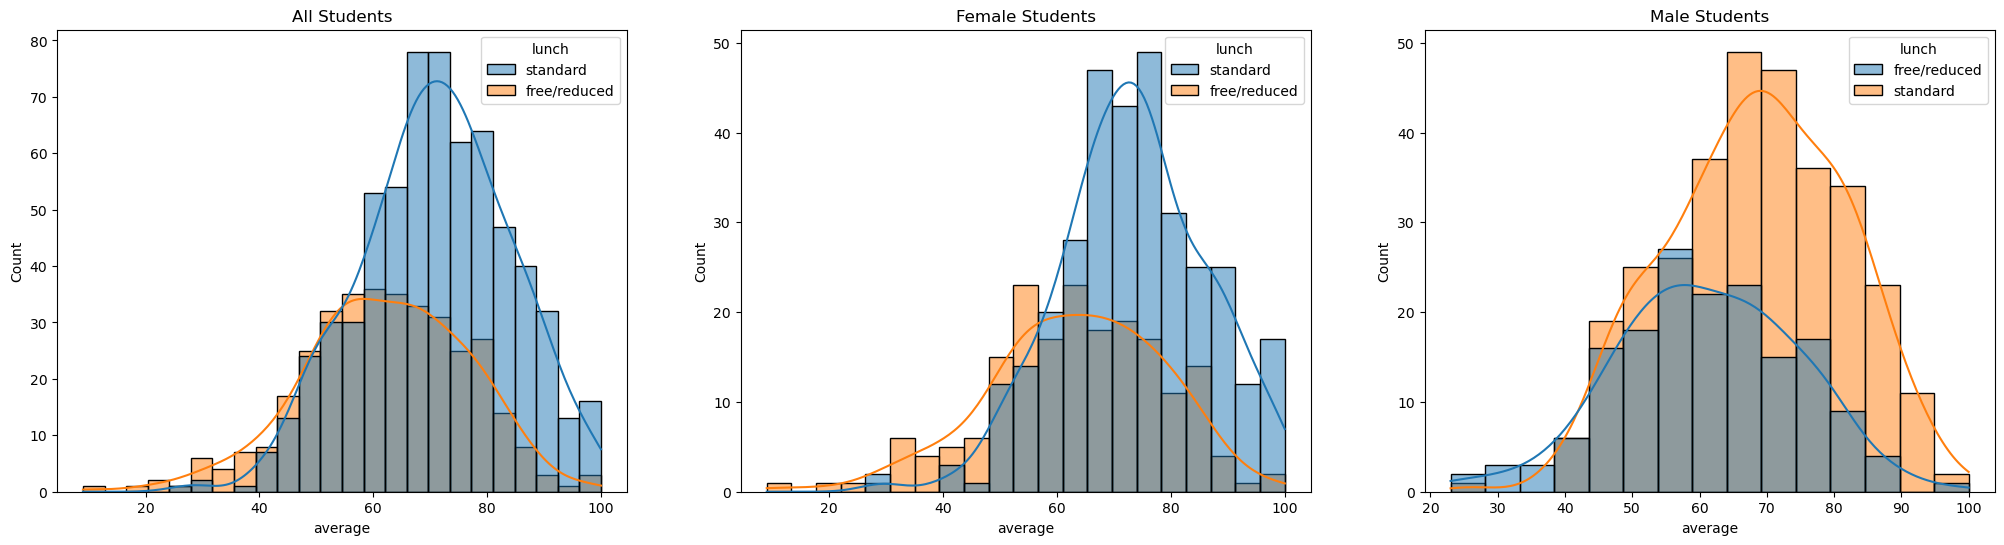

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average',kde=True,bins='fd',hue='lunch')
plt.title('All Students')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,bins='fd',hue='lunch')
plt.title('Female Students')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins='fd',hue='lunch')
plt.title('Male Students')
plt.show()

## Insights
### Standard lunch is performing better when compared with free/reduced lunch

In [18]:
df.groupby(by='lunch').mean()

,math_score,reading_score,writing_score,total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


In [19]:
df.groupby(by=['lunch','gender']).mean()

math_score  reading_score  writing_score  total_score  \
lunch        gender                                                          
free/reduced female   55.814815      67.386243      66.444444   189.645503   
             male     62.457831      61.542169      59.126506   183.126506   
standard     female   68.124620      75.607903      75.927052   219.659574   
             male     72.022152      67.537975      65.509494   205.069620   

                       average  
lunch        gender             
free/reduced female  63.215168  
             male    61.042169  
standard     female  73.219858  
             male    68.356540

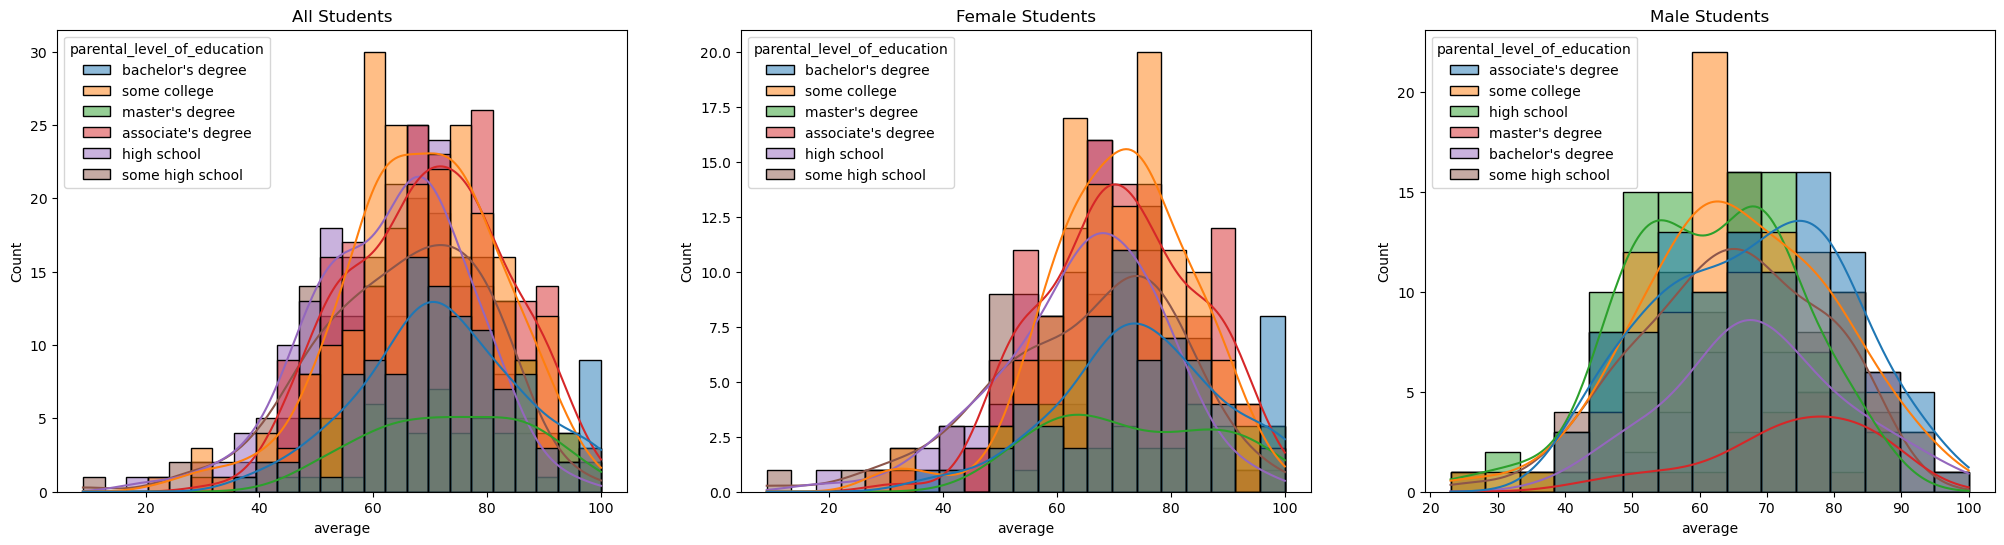

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average',kde=True,bins='fd',hue='parental_level_of_education')
plt.title('All Students')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,bins='fd',hue='parental_level_of_education')
plt.title('Female Students')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins='fd',hue='parental_level_of_education')
plt.title('Male Students')
plt.show()

In [21]:
df.groupby(by='parental_level_of_education').mean().sort_values(by='average',ascending=False)

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007
high school,62.137755,64.704082,62.448980,189.290816,63.096939


In [22]:
df.groupby(by = ['parental_level_of_education','gender']).mean()

math_score  reading_score  writing_score  \
parental_level_of_education gender                                             
associate's degree          female   65.250000      74.120690      74.000000   
                            male     70.764151      67.433962      65.405660   
bachelor's degree           female   68.349206      77.285714      78.380952   
                            male     70.581818      68.090909      67.654545   
high school                 female   59.351064      68.202128      66.691489   
                            male     64.705882      61.480392      58.539216   
master's degree             female   66.500000      76.805556      77.638889   
                            male     74.826087      73.130435      72.608696   
some college                female   65.406780      73.550847      74.050847   
                            male     69.009259      64.990741      63.148148   
some high school            female   59.296703      69.109890      68.285714   
                            male     67.840909      64.693182      61.375000   

                                    total_score    average  
parental_level_of_education gender                          
associate's degree          female   213.370690  71.123563  
                            male     203.603774  67.867925  
bachelor's degree           female   224.015873  74.671958  
                            male     206.327273  68.775758  
high school                 female   194.244681  64.748227  
                            male     184.725490  61.575163  
master's degree             female   220.944444  73.648148  
                            male     220.565217  73.521739  
some college                female   213.008475  71.002825  
                            male     197.148148  65.716049  
some high school            female   196.692308  65.564103  
                            male     193.909091  64.636364

In [23]:
df.groupby(by = ['gender','parental_level_of_education']).mean()

math_score  reading_score  writing_score  \
gender parental_level_of_education                                             
female associate's degree            65.250000      74.120690      74.000000   
       bachelor's degree             68.349206      77.285714      78.380952   
       high school                   59.351064      68.202128      66.691489   
       master's degree               66.500000      76.805556      77.638889   
       some college                  65.406780      73.550847      74.050847   
       some high school              59.296703      69.109890      68.285714   
male   associate's degree            70.764151      67.433962      65.405660   
       bachelor's degree             70.581818      68.090909      67.654545   
       high school                   64.705882      61.480392      58.539216   
       master's degree               74.826087      73.130435      72.608696   
       some college                  69.009259      64.990741      63.148148   
       some high school              67.840909      64.693182      61.375000   

                                    total_score    average  
gender parental_level_of_education                          
female associate's degree            213.370690  71.123563  
       bachelor's degree             224.015873  74.671958  
       high school                   194.244681  64.748227  
       master's degree               220.944444  73.648148  
       some college                  213.008475  71.002825  
       some high school              196.692308  65.564103  
male   associate's degree            203.603774  67.867925  
       bachelor's degree             206.327273  68.775758  
       high school                   184.725490  61.575163  
       master's degree               220.565217  73.521739  
       some college                  197.148148  65.716049  
       some high school              193.909091  64.636364

## Insights 
* In General Parantal Level of education does not help students to perform well in exam
* For plot 2 in male students perform well with parental level of education is masters degree
* For plot 3 in female students have no effect with parental level of education


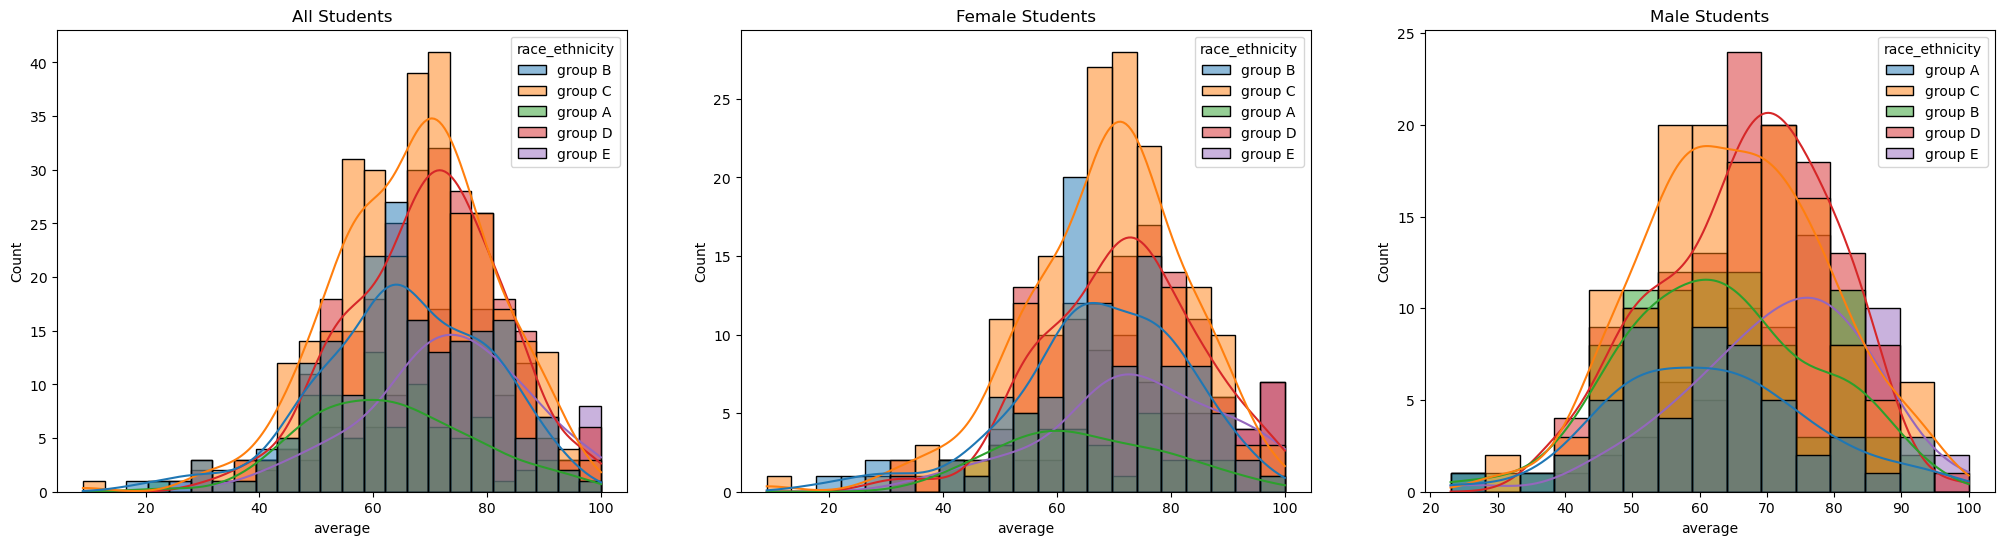

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average',kde=True,bins='fd',hue='race_ethnicity')
plt.title('All Students')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,bins='fd',hue='race_ethnicity')
plt.title('Female Students')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins='fd',hue='race_ethnicity')
plt.title('Male Students')
plt.show()

In [25]:
df.groupby(by='race_ethnicity').mean().sort_values(by='average',ascending=False)

,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group E,73.821429,73.028571,71.407143,218.257143,72.752381
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group A,61.629213,64.674157,62.674157,188.977528,62.992509


In [26]:
df.groupby(by=['race_ethnicity','gender']).mean()

math_score  reading_score  writing_score  total_score  \
race_ethnicity gender                                                          
group A        female   58.527778      69.000000      67.861111   195.388889   
               male     63.735849      61.735849      59.150943   184.622642   
group B        female   61.403846      71.076923      70.048077   202.528846   
               male     65.930233      62.848837      60.220930   189.000000   
group C        female   62.033333      71.944444      71.777778   205.755556   
               male     67.611511      65.424460      62.712230   195.748201   
group D        female   65.248062      74.046512      75.023256   214.317829   
               male     69.413534      66.135338      65.413534   200.962406   
group E        female   70.811594      75.840580      75.536232   222.188406   
               male     76.746479      70.295775      67.394366   214.436620   

                         average  
race_ethnicity gender             
group A        female  65.129630  
               male    61.540881  
group B        female  67.509615  
               male    63.000000  
group C        female  68.585185  
               male    65.249400  
group D        female  71.439276  
               male    66.987469  
group E        female  74.062802  
               male    71.478873

In [27]:
df.groupby(by=['gender','race_ethnicity']).mean()

math_score  reading_score  writing_score  total_score  \
gender race_ethnicity                                                          
female group A          58.527778      69.000000      67.861111   195.388889   
       group B          61.403846      71.076923      70.048077   202.528846   
       group C          62.033333      71.944444      71.777778   205.755556   
       group D          65.248062      74.046512      75.023256   214.317829   
       group E          70.811594      75.840580      75.536232   222.188406   
male   group A          63.735849      61.735849      59.150943   184.622642   
       group B          65.930233      62.848837      60.220930   189.000000   
       group C          67.611511      65.424460      62.712230   195.748201   
       group D          69.413534      66.135338      65.413534   200.962406   
       group E          76.746479      70.295775      67.394366   214.436620   

                         average  
gender race_ethnicity             
female group A         65.129630  
       group B         67.509615  
       group C         68.585185  
       group D         71.439276  
       group E         74.062802  
male   group A         61.540881  
       group B         63.000000  
       group C         65.249400  
       group D         66.987469  
       group E         71.478873

In [28]:
#sns.pairplot(hue='gender')

<AxesSubplot: >

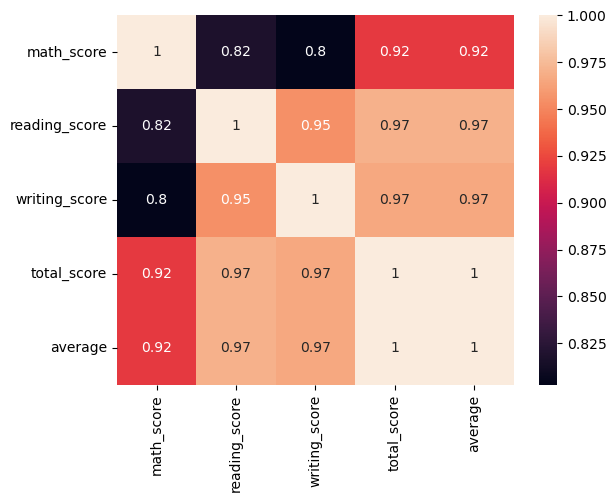

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# printing top 5 rows of Student Performance dataset
print('Top 5 rows of Student Performance Dataset')
print(df.head())
print('\n==========================================================================\n')

# Define categorical columns with target
new_cols = categorical_features + ['average']

# Define the model formula
model_formula = "average ~ C(lunch) + C(gender) + C(lunch):C(gender)"

# Fit the model using OLS regression
model = ols(model_formula, df[['lunch','gender','average']]).fit()

print("ANOVA Table:")
print(anova_lm(model,typ=2))

Top 5 rows of Student Performance Dataset
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667 

## Insights of above ANOVA assuming signigicance level alpha = 0.05
* Lunch Has significant impact on Average Score of students
* Gender Has Significant impact on Average Score of Students
* Interaction effect of Lunch and Gender combined does not have impact on scores of students

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# printing top 5 rows of Student Performance dataset
print('Top 5 rows of Student Performance Dataset')
print(df.head())
print('\n==========================================================================\n')

# Define categorical columns with target
new_cols = categorical_features + ['average']

# Define the model formula
model_formula = "average ~ C(gender) + C(race_ethnicity) +  C(parental_level_of_education) +C(lunch) + C(test_preparation_course) "

# Fit the model using OLS regression
model = ols(model_formula, df[new_cols]).fit()

print("ANOVA Table:")
print(anova_lm(model,typ=2))

Top 5 rows of Student Performance Dataset
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667 

## Insights 
* All the categorical Data Has significant Main Interaction with Average Score of stucent